In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pycaret.regression import *

In [2]:
%cd ..
%cd data\processed
df = pd.read_csv('2.0 Processed Data with Scaled and Log Transformations.csv', index_col='Unnamed: 0')

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions
C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions\data\processed


In [3]:
pd.set_option('display.max_columns',50)
df = df.drop(['first_cont_after', 'first_cont_order', 'days_to_donation','tot_contribution_paid_amt'], axis=1)
df.head()

,owner_no,order_dt,tot_ticket_paid_amt,first_order_dt,first_cont_dt,geo_area_desc,Prelim Capacity,ltv_tkt_value,Lifetime Giving,prospect_board,rolling_tkt_sum,channel_desc_3rd Party,channel_desc_At the Performance,channel_desc_Chat,channel_desc_Default Channel,channel_desc_Email,channel_desc_Fax,channel_desc_Internal Request,channel_desc_Mail,channel_desc_Mobile,channel_desc_Online,channel_desc_Phone,channel_desc_Telefunding,channel_desc_Walk Up,MOS_desc_External,MOS_desc_Internal,MOS_desc_Ticketing,delivery_desc_Digital,delivery_desc_Do Not Print Tickets,delivery_desc_Mail,delivery_desc_Will Call,facility_desc_Academy of Music,facility_desc_Fundraiser,facility_desc_Independence Mall,facility_desc_Other,facility_desc_Perelman,facility_desc_Small venue
0,111,2015-10-07,0.262550,2015-10-07,1900-01-01,1,5,0.104660,0.0,0,0.067821,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,111,2016-09-16,0.280947,2015-10-07,1900-01-01,1,5,0.104660,0.0,0,0.162745,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
2,111,2018-09-21,0.170287,2015-10-07,1900-01-01,1,5,0.104660,0.0,0,0.189150,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,258,2014-09-28,0.290096,2014-09-28,1900-01-01,5,6,0.014668,0.0,0,0.093029,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4,262,2014-10-02,0.110229,2014-10-02,1900-01-01,2,4,-0.058711,0.0,0,0.065087,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [4]:
setup(
    df, 
    target = 'Lifetime Giving',
    train_size = 0.8,
    verbose = True,
    numeric_features = [
        'geo_area_desc',
        'Prelim Capacity'
    ]
)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,3122
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(70372, 37)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,27
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(        owner_no  tot_ticket_paid_amt  geo_area_desc  Prelim Capacity  \
 0          111.0             0.262550            1.0              5.0   
 1          111.0             0.280947            1.0              5.0   
 2          111.0             0.170287            1.0              5.0   
 3          258.0             0.290096            5.0              6.0   
 4          262.0             0.110229            2.0              4.0   
 ...          ...                  ...            ...              ...   
 70367  2419011.0            -0.720197            2.0              5.0   
 70368  2419126.0            -0.720197            1.0              0.0   
 70369  2419248.0             0.420163            2.0              4.0   
 70370  2419278.0             0.405498            1.0              3.0   
 70371  2419301.0             0.243553            1.0              0.0   
 
        ltv_tkt_value  rolling_tkt_sum  prospect_board_0  prospect_board_1  \
 0           0.104660         0.

In [6]:
model = compare_models(exclude = ['ransac'], verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Random Forest,0.0707,0.0966,0.3096,0.9892,0.0514,0.0694,14.7039
1,Extra Trees Regressor,0.0689,0.0981,0.3123,0.9890,0.0505,0.0675,20.2937
2,CatBoost Regressor,0.1032,0.1082,0.3285,0.9879,0.0558,0.0886,16.8837
3,Extreme Gradient Boosting,0.0963,0.1086,0.3291,0.9879,0.0560,0.0859,12.4812
4,Light Gradient Boosting Machine,0.1246,0.1783,0.4216,0.9801,0.0710,0.1146,0.7353
5,Decision Tree,0.0711,0.1797,0.4216,0.9799,0.0639,0.0691,0.4565
6,Gradient Boosting Regressor,0.1889,0.3314,0.5754,0.9630,0.0903,0.1635,19.9747
7,Ridge Regression,0.4368,0.9014,0.9493,0.8992,0.2389,0.2372,0.1130
8,Bayesian Ridge,0.4369,0.9014,0.9493,0.8992,0.2389,0.2372,0.6749
9,Linear Regression,0.4368,0.9014,0.9493,0.8992,0.2389,0.2372,0.4633


In [ ]:
model = create_model('dt')

In [7]:
%cd ..\..
%cd ML_Contributions\reports\figures

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions
[WinError 3] The system cannot find the path specified: 'ML_Contributions\\reports\\figures'
C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions


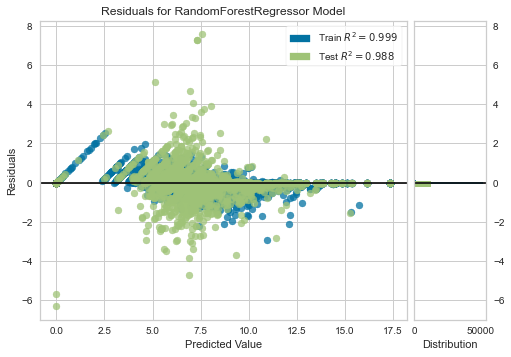

In [8]:
plot_model(model, plot='residuals', save=True, verbose=True)

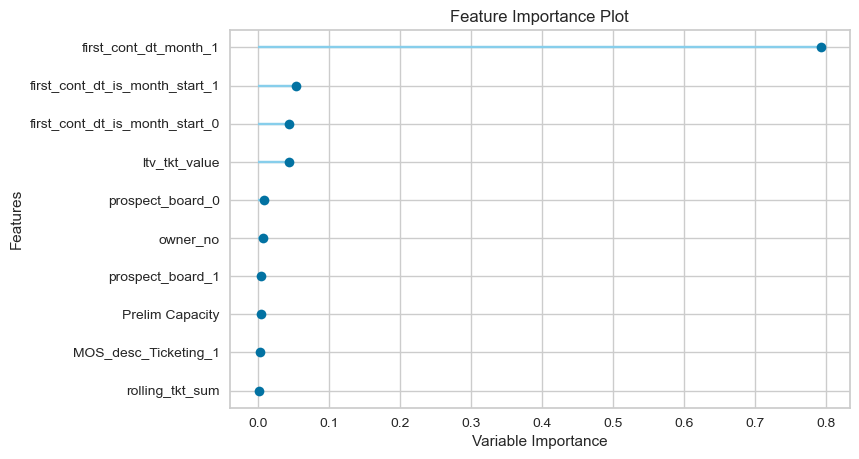

In [9]:
plot_model(model, plot='feature', save=True, verbose=True)

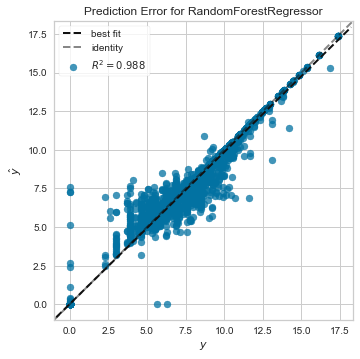

In [10]:
plot_model(model, plot='error', save=True, verbose=True)

In [11]:
predict_model(model, verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0691,0.1042,0.3228,0.9884,0.0603,0.0655


,owner_no,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,ltv_tkt_value,rolling_tkt_sum,prospect_board_0,prospect_board_1,channel_desc_3rd Party_0,channel_desc_3rd Party_1,...,first_cont_dt_weekday_3,first_cont_dt_weekday_4,first_cont_dt_weekday_5,first_cont_dt_weekday_6,first_cont_dt_is_month_end_0,first_cont_dt_is_month_end_1,first_cont_dt_is_month_start_0,first_cont_dt_is_month_start_1,Lifetime Giving,Label
0,2057369.0,-0.720197,3.0,3.0,0.368869,0.603477,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,10.573366,9.9567
1,2381081.0,0.441821,1.0,0.0,0.144661,0.231875,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0000
2,1477795.0,0.155966,1.0,0.0,0.116452,0.082272,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0000
3,814721.0,0.030332,1.0,2.0,0.238381,-0.144686,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0000
4,1771805.0,-0.720197,1.0,0.0,-0.850911,-0.831507,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14070,2398933.0,0.346012,7.0,5.0,0.225722,0.259632,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0000
14071,2415040.0,0.264506,4.0,3.0,-0.007256,0.069611,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0000
14072,2404247.0,-0.720197,1.0,0.0,-0.850911,-0.831507,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0000
14073,2033204.0,-0.720197,1.0,4.0,-0.850911,-0.831507,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0000


In [12]:
%cd Springboard/ML_Contributions/models

[WinError 3] The system cannot find the path specified: 'Springboard/ML_Contributions/models'
C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions


In [13]:
save_model(model, 'PyCaret on Target 4', verbose=True)

Transformation Pipeline and Model Succesfully Saved


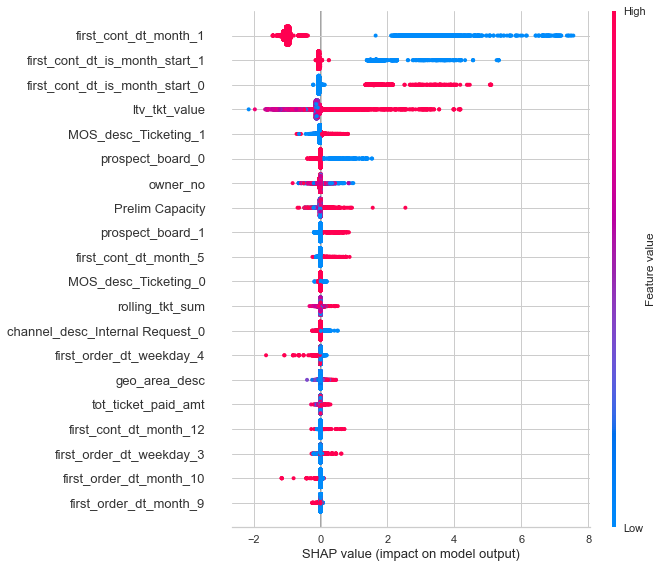

In [14]:
interpret_model(model)